In [1]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")

# importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

import time
from tqdm import tqdm

# ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# set Randomseed
RSEED = 42

In [2]:
# load the first 100k lines of the review file into a dataframe

dfr = pd.read_csv('../data/yelp_dataset/review_1819_eng.csv')

In [4]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')


In [ ]:
#define function for textcleaning
punctuation = ['"', '(', ')', '-', '$', ',', '+', "'", "\n", "\r"]

def clean_text(text):   
    cleaned_text = "".join(u for u in text if u not in punctuation)
    return cleaned_text

In [6]:
# remove punctuation from the text in the initial df
dfr['text'] = dfr['text'].apply(clean_text)

In [7]:
#initialize vectorizer Parameter nach Susan Li
vectorizer = TfidfVectorizer(   sublinear_tf=True, 
                                min_df=5, 
                                norm='l2', 
                                encoding='latin-1', 
                                ngram_range=(1, 2), 
                                stop_words=stopwords)



In [8]:
# split data into feature and target 
X = dfr['text']
y = dfr['stars']

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED)

# fit and apply the vectorizer
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


              precision    recall  f1-score   support

         1.0       0.88      0.70      0.78     90123
         2.0       0.00      0.55      0.01       205
         3.0       0.02      0.43      0.03      1507
         4.0       0.10      0.31      0.15     22865
         5.0       0.98      0.67      0.79    288379

    accuracy                           0.65    403079
   macro avg       0.40      0.53      0.35    403079
weighted avg       0.91      0.65      0.75    403079



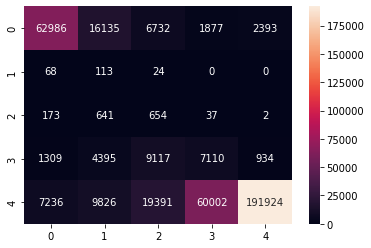

In [9]:

# initialize the Classifier
MNB = MultinomialNB()

# fit the model
MNB.fit(X_train, y_train)

# make predictions
y_pred = MNB.predict(X_test)

# test the model
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')

# show the classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.87      0.77      0.82     81022
         2.0       0.29      0.44      0.35     20427
         3.0       0.36      0.48      0.41     27304
         4.0       0.42      0.51      0.46     56324
         5.0       0.91      0.81      0.86    218002

    accuracy                           0.72    403079
   macro avg       0.57      0.60      0.58    403079
weighted avg       0.76      0.72      0.74    403079



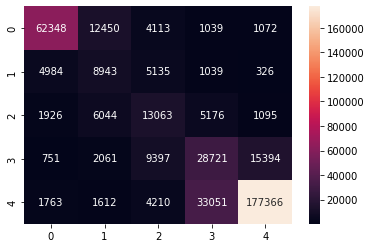

In [10]:
# initialize the Classifier
LSVC = LinearSVC()

# fit the model
LSVC.fit(X_train, y_train)

# make predictions
y_pred = LSVC.predict(X_test)

# test the model
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')

# show the classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.87      0.77      0.82     81697
         2.0       0.30      0.47      0.36     19741
         3.0       0.43      0.50      0.46     30621
         4.0       0.40      0.57      0.47     48578
         5.0       0.92      0.81      0.86    222442

    accuracy                           0.73    403079
   macro avg       0.58      0.62      0.60    403079
weighted avg       0.78      0.73      0.75    403079



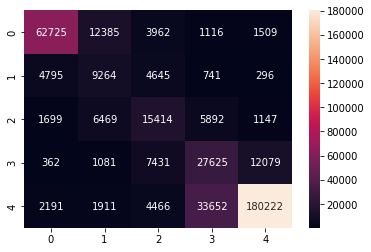

In [11]:
# initialize the Classifier
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train, y_train)    

# make predictions
y_pred = logreg.predict(X_test)

# test the model
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')

# show the classification report
print(classification_report(y_pred, y_test))